In [ ]:
pip install -qU "langchain[mistralai]"

In [ ]:

import getpass
import os

if not os.environ.get("MISTRAL_API_KEY"):
  os.environ["MISTRAL_API_KEY"] = getpass.getpass("Enter API key for Mistral AI: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("mistral-large-latest", model_provider="mistralai")

KeyboardInterrupt: Interrupted by user

In [ ]:
model.invoke("Hello, world!")

In [ ]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [ ]:
style = """American English \
in a calm and respectful tone
"""

prompt = f"""Translate the text \
that is delimited by triple backticks
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

In [ ]:
print(model.invoke(prompt).content)

# Prompt Template using LangChain

In [ ]:
!pip install langchain-community

In [ ]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)


In [ ]:
# print(prompt_template.get_prompts)
print(prompt_template.messages[0].prompt)

In [ ]:
prompt_template.messages[0].prompt.input_variables

In [ ]:
customer_style = """American English \
in a calm and respectful tone
"""

customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse, \
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

In [ ]:
customer_messages  = prompt_template.format_messages(
    style=customer_style,
    text=customer_email
)

In [ ]:
print(customer_messages)

In [ ]:
# type(customer_messages)
print(type(customer_messages[0]))

In [ ]:
model.invoke(customer_messages).content

# langchain_docs

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}")


In [ ]:
prompt_template.invoke({"topic": "blenders"})

# ChatPromptTemplates

In [ ]:
from langchain.prompts import ChatPromptTemplate

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("user", "Tell me a joke about {topic}")
])

prompt_template.invoke({"topic": "cats"})

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage


prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    MessagesPlaceholder("chat_history"),

])

In [ ]:
prompt_template.invoke({"chat_history": [HumanMessage(content="Hi")]})

In [ ]:
prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("placeholder", "{msgs}") # <-- This is the changed part
])

In [ ]:
prompt_template

# LangChain Output Parsing

In [ ]:
x = {
  "gift": False,
  "delivery_days": 5,
  "price_value": "pretty affordable!"
}

In [ ]:
x.get("gift")
x["delivery_days"]

In [ ]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [ ]:
! pip install Langchain -q
! pip install langchain community -q

In [ ]:
prompt_template = ChatPromptTemplate.from_template(review_template)
prompt_template

In [ ]:
messages  = prompt_template.format_messages(text=customer_review)

In [ ]:
messages

In [ ]:
model.invoke(messages).content

In [ ]:
print(model.invoke(messages).content)


In [ ]:
print(model.invoke(messages).content["gift"])

In [ ]:
print(type(model.invoke(messages).content[10]))


In [ ]:
! pip install json-repair

In [ ]:
import json
from json_repair import json_repair

In [ ]:
model.invoke(messages).content

# Parse the LLM Output String into a Python Dictionary

In [ ]:
from langchain.output_parsers import ResponseSchema, StructuredOutputParser

In [ ]:
gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")

delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")

price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price,and output them as a \
                                    comma separated Python list.")

ResponseSchema = [gift_schema,
                  delivery_days_schema,
                  price_value_schema]

In [ ]:
ResponseSchema

In [ ]:
output_parsers = StructuredOutputParser.from_response_schemas(ResponseSchema)

In [ ]:
output_parsers

In [ ]:
format_instruction = output_parsers.get_format_instructions()

In [ ]:
format_instruction

In [ ]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

In [ ]:
prompt_template = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt_template.format_messages(text=customer_review,
                                           format_instructions=format_instruction)

In [ ]:
model.invoke(messages).content

In [ ]:
print(model.invoke(messages).content[0])

In [ ]:
print(model.invoke(messages).content)

In [ ]:
response = model.invoke(messages)

In [ ]:
response.content["gift"]

In [ ]:
output_parsers = output_parsers.parse(response.content)

In [ ]:
output_parsers

In [ ]:
output_parsers["gift"]

# Understanding LangChain Chains

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.DataFrame({"Product":["Queen Size Sheet Set","Waterproof Phone Pouch","Luxury Air Mattress","Pillows Insert","Milk Frother Handheld\n	"],"Review":["I ordered a king size set. My only criticism w...","I loved the waterproof sac, although the openi...","This mattress had a small hole in the top of i...","This is the best throw pillow fillers on Amazo...","I loved this product. But they only seem to l..."]})

In [ ]:
df

# simple chain

In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain.chains import LLMChain

In [ ]:
prompt = ChatPromptTemplate.from_template("What is the best product based on the following review: {product}")


In [ ]:
prompt

In [ ]:
chain  = LLMChain(llm=model, prompt=prompt)

In [ ]:
product = "Deep Learning GPUs"

In [ ]:
print(chain.run(product))

# Sequential Chains

In [ ]:
from langchain.chains import SimpleSequentialChain

In [ ]:
first_prompt = ChatPromptTemplate.from_template( "What is the best name to describe \
    a company that makes {product}?"
)

chain_one = LLMChain(llm=model, prompt=first_prompt)

In [ ]:
# prompt template 2
second_prompt = ChatPromptTemplate.from_template(
    "Write a 30 words description for the following \
    company:{company_name}"
)
# chain 2
chain_two = LLMChain(llm=model, prompt=second_prompt)

In [ ]:
overall_simple_chain = SimpleSequentialChain(chains=[chain_one, chain_two],verbose= True)

In [ ]:
overall_simple_chain

In [ ]:
overall_simple_chain.run(product)

### The simple sequential chain works well when there’s only a single input and a single output. But what about when there are multiple inputs or multiple outputs? And so we can do this by using just the regular sequential chain.

# Complex Sequential Chain

In [ ]:
from langchain.chains import SequentialChain

In [ ]:
first_prompt = ChatPromptTemplate.from_template("Translate the following review to english:"
    "\n\n{Review}")

chain_one = LLMChain(llm=model, prompt=first_prompt, output_key = "English_Review")

In [ ]:
second_prompt = ChatPromptTemplate.from_template(
    "Can you summarize the following review in 1 sentence:"
    "\n\n{English_Review}"
)
# chain 2: input= English_Review and output= summary
chain_two = LLMChain(llm=model, prompt=second_prompt,
                     output_key="summary"
                    )

In [ ]:
# prompt template 3: translate to english
third_prompt = ChatPromptTemplate.from_template(
    "What language is the following review:\n\n{Review}"
)
# chain 3: input= Review and output= language
chain_three = LLMChain(llm=model, prompt=third_prompt,
                       output_key="language"
                      )

In [ ]:
fourth_prompt = ChatPromptTemplate.from_template(
    "Write a follow up response to the following "
    "summary in the specified language:"
    "\n\nSummary: {summary}\n\nLanguage: {language}"
)
# chain 4
chain_four = LLMChain(llm=model, prompt=fourth_prompt,
                      output_key="followup_message"
                     )

In [ ]:
# overall_chain: input= Review
# and output= English_Review,summary, followup_message

overall_chain = SequentialChain(
    chains=[chain_one, chain_two, chain_three, chain_four],
    input_variables=["Review"],
    output_variables=["English_Review", "summary","followup_message"],
    verbose=True
)

In [ ]:
df

In [ ]:
review = df.Review[4]

In [ ]:
overall_chain(review)

# Router Chain

### So far, we’ve covered the LLM chain and then a sequential chain. But what if you want to do something more complicated? A pretty common but basic operation is to route an input to a chain depending on what exactly that input is.

### A good way to imagine this is if you have multiple subchains, each of which is specialized for a particular type of input, you could have a router chain, which first decides which subchain to pass it to and then passes it to that chain.

### For a concrete example, let’s look at where we are routing between different types of chains depending on the subject that seems to come in. So we have here different prompts. One prompt is good for answering physics questions. The second prompt is good for answering math questions, the third for history, and then a fourth for computer science. Let’s define all these prompt templates.

In [ ]:
physics_template = """You are a very smart physics professor. \
You are great at answering questions about physics in a concise\
and easy to understand manner. \
When you don't know the answer to a question you admit\
that you don't know.

Here is a question:
{input}"""


math_template = """You are a very good mathematician. \
You are great at answering math questions. \
You are so good because you are able to break down \
hard problems into their component parts,
answer the component parts, and then put them together\
to answer the broader question.

Here is a question:
{input}"""

history_template = """You are a very good historian. \
You have an excellent knowledge of and understanding of people,\
events and contexts from a range of historical periods. \
You have the ability to think, reflect, debate, discuss and \
evaluate the past. You have a respect for historical evidence\
and the ability to make use of it to support your explanations \
and judgements.

Here is a question:
{input}"""


computerscience_template = """ You are a successful computer scientist.\
You have a passion for creativity, collaboration,\
forward-thinking, confidence, strong problem-solving capabilities,\
understanding of theories and algorithms, and excellent communication \
skills. You are great at answering coding questions. \
You are so good because you know how to solve a problem by \
describing the solution in imperative steps \
that a machine can easily interpret and you know how to \
choose a solution that has a good balance between \
time complexity and space complexity.

Here is a question:
{input}"""

In [ ]:
prompt_info = [{
    "name": "physics",
    "description": "Good for answering questions about physics",
    "prompt_template": physics_template
},
{
    "name": "math",
    "description": "Good for answering math questions",
    "prompt_template": math_template
},
{
    "name": "History",
    "description": "Good for answering history questions",
    "prompt_template": history_template
},
{
    "name": "computer science",
    "description": "Good for answering computer science questions",
    "prompt_template": computerscience_template
}]

## comperhensive example

In [ ]:
from langchain.chains import LLMChain
from langchain.chains.router import MultiPromptChain
from langchain.prompts.chat import ChatPromptTemplate
from langchain.prompts import PromptTemplate,ChatPromptTemplate

In [ ]:
# qa_prompt = PromptTemplate(
#    template="ترجم الجملة التالية إلى اللغة الإنجليزية:\n\n{input}",
#     input_variables=["input"]

# )

# sentiment_prompt = PromptTemplate(
#     template="حلل مشاعر النص التالي (إيجابي، سلبي، محايد):\n\n{text}",
#     input_variables=["text"]
# )
# translation_prompt = PromptTemplate(
#     template="ترجم الجملة التالية إلى اللغة الإنجليزية:\n\n{input}",
#     input_variables=["input"]
# )


# # # chains
# # qa_chain = LLMChain(llm=model, prompt=qa_prompt)
# # sentiment_chain = LLMChain(llm=model, prompt=sentiment_prompt)
# # translation_chain = LLMChain(llm=model, prompt=translation_prompt)


# # =============== Chains ===============
# qa_chain = qa_prompt | model
# translation_chain = translation_prompt | model
# sentiment_chain = sentiment_prompt | model

# # router prompt

# router_prompt = PromptTemplate(
#    input_variables=["input"],
#    template = """
#    حدد نوع الطلب التالي من أحد الأنواع التالية فقط:
# - translation
# - qa
# - sentiment

# ثم أجب فقط بالكلمة المناسبة دون أي شرح.

# نص الطلب:
# {input}
# """,
# )


# #router chain


# router_chain = LLMChain(llm= model, prompt=router_prompt)


# # MultiPromptChain


# multi_chain = MultiPromptChain(
#     router_chain=router_chain,
#     destination_chains={
#         "qa": qa_chain,
#         "translation": translation_chain,
#         "sentiment": sentiment_chain,
#     },
#     default_chain=qa_chain  # fallback لو التوجيه فشل
# )










In [ ]:
from langchain.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableBranch, RunnableLambda

In [ ]:
# prompts
qa_prompt = ChatPromptTemplate.from_messages([
    ("system","أنت مساعد للإجابة على الأسئلة العامة."),
    ("user","أجب على السؤال التالي بإيجاز: {input}")


])


translation_prompt = ChatPromptTemplate.from_messages([
    ("system", "أنت مترجم محترف."),
    ("user", "ترجم الجملة التالية إلى الإنجليزية: {input}")
])

sentiment_prompt = ChatPromptTemplate.from_messages([
    ("system", "أنت محلل مشاعر."),
    ("user", "حلل مشاعر النص التالي: {input}")
])
#chains

qa_chain = qa_prompt | model
translation_chain = translation_prompt | model
sentiment_chain = sentiment_prompt | model


# Router

def router_fn(input:dict):
    text = input["input"].lower()

    if "ترجم" in text or "translate" in text:
        return "translation"
    elif "مشاعر" in text or "شعور" in text or "sentiment" in text:
        return "sentiment"
    else:
        return "qa"

router_chain = RunnableBranch(
     (lambda x: router_fn(x)  == "translation", translation_chain),
    (lambda x : router_fn(x) == "sentiment", sentiment_chain),
    (lambda x : router_fn(x) == "qa", qa_chain),
    qa_chain
)


examples = [
    "ما هو الذكاء الاصطناعي؟",
    "ترجم لي الجملة دي: أنا بحب البرمجة.",
    "أنا حاسس إن الحياة صعبة ومحبطة."
]

# # examples = list(input("Enter some examples: ").split(","))
# examples = input("Enter some examples: ")






In [ ]:
# test
for example in examples:
  print(f"\n📝 السؤال: {example}")
  result = router_chain.invoke({"input": example})
  print(f"🤖 الرد: {result.content}")

# ChatBots Memory

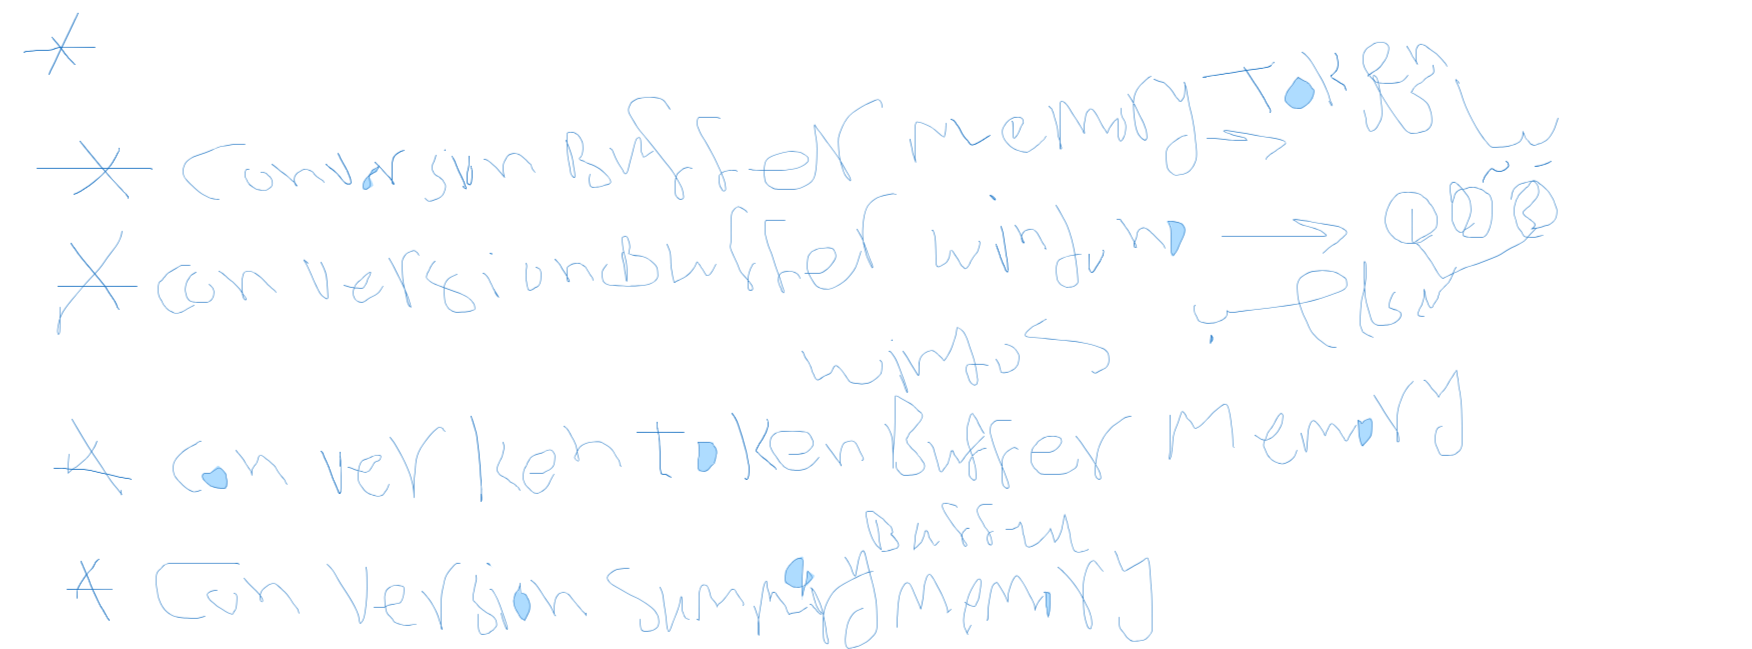

# Conversation Buffer Memory

In [ ]:
from langchain.memory import ConversationBufferMemory, ConversationTokenBufferMemory, ConversationBufferWindowMemory, ConversationSummaryBufferMemory
from langchain.chains import ConversationChain

In [ ]:
memory = ConversationBufferMemory()
conversation = ConversationChain(llm = model, memory = memory, verbose = True)

In [ ]:
conversation.predict(input="hello my name ahmed")

In [ ]:
conversation.predict(input="What is 1+1?")

In [ ]:
# memory.load_memory_variables({})
# # or
memory.buffer

In [ ]:
memory = ConversationBufferMemory()
memory.save_context({"input":"HI"},
                   { "Output" : "What's UP"})

In [ ]:
memory

In [ ]:
memory.buffer

# 2- Conversation Buffer Window Memory

In [ ]:
memory_w = ConversationBufferWindowMemory(k=1)


In [ ]:
memory_w.buffer

In [ ]:
memory_w.load_memory_variables({})

In [ ]:
memory_w.save_context({"input": "Hi, im ahmed"},
                    {"output": "What's up"})
memory_w.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory_w.load_memory_variables({})

### it's save latest one only becuase i specify one windos

In [ ]:
conversation_w = ConversationChain(llm = model, memory = memory_w)

In [ ]:
conversation_w.predict(input= "hello how are you")

In [ ]:
conversation_w.predict(input= "what is my name")

it's response ``` I don't have access to personal information about you ```

# Conversation Token Buffer Memory

In [ ]:
memoy_t = ConversationTokenBufferMemory(llm=model, max_token_limit=15)

In [ ]:
memoy_t.load_memory_variables({})

In [ ]:
memoy_t.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memoy_t.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memoy_t.save_context({"input": "Chatbots are what?"},
                    {"output": "Charmingss!"})

In [ ]:
memoy_t.load_memory_variables({})

# Conversation Summary Memory

In [ ]:
memory_s = ConversationSummaryBufferMemory(llm= model, max_token_limit=3)

### If we were to reduce the max token limit to 100 tokens, then the conversation summary buffer memory would use an LLM, the mistral endpoint in this case to generate a summary of the conversation as shown below:

In [ ]:
 memory_s.buffer

In [ ]:
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

In [ ]:
memory_s.save_context({"input": "Hello"}, {"output": "What's up"})
memory_s.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory_s.save_context({"input": "What is on the schedule today?"},
                    {"output": f"{schedule}"})

In [ ]:
memory_s.buffer

In [ ]:
memory_s.load_memory_variables({})

In [ ]:
conversation = ConversationChain(
    llm=model,
    memory = memory,
    verbose=True
)
conversation.predict(input="What would be a good demo to show?")

# emdding


In [ ]:
! pip install mistralai -q

In [ ]:
! pip install docarray -q
!pip install tiktoken -q
!pip install pypdf -q

In [ ]:
import os
from mistralai import Mistral

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
file = "/content/Ahmed-MahmoudL-CVNIl.pdf"

In [ ]:
loader = PyPDFLoader(file_path=file)

In [ ]:
data = loader.load()

In [ ]:
data

In [ ]:
type(data)

In [ ]:
data[0].page_content

In [ ]:
texts = [doc.page_content for doc in data]

In [ ]:
type(texts)

In [ ]:
texts[0]

In [ ]:
import os

In [ ]:
os.environ["MISTRAL_API_KEY"]= "Your_Api"

In [ ]:
from langchain_mistralai import MistralAIEmbeddings
embedding_model = MistralAIEmbeddings(model="mistral-embed")

In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore

# Indexing and Retrieval

In [ ]:
vectorstore = InMemoryVectorStore.from_texts(
    texts,
    embedding = embedding_model
)

In [ ]:
# Use the vectorstore as a retriever
retriever = vectorstore.as_retriever()

In [ ]:
# Retrieve the most similar text
retrieved_documents = retriever.invoke("what is the FlowCV")

In [ ]:
retrieved_documents[0].page_content

In [ ]:
# Initialize Mistral Language Model
llm = model

In [ ]:
llm

In [ ]:
from langchain_mistralai.chat_models import ChatMistralAI

In [ ]:
llm = ChatMistralAI(model= "mistral-large-latest", temperature=0.9)

In [ ]:
llm

# Create the Retrieval QA Chain

In [ ]:
from langchain.chains import RetrievalQA

In [ ]:
qa_chain = RetrievalQA.from_chain_type(llm= llm,
                       chain_type= "stuff",
                       retriever= retriever,
                       verbose= True,
                       chain_type_kwargs= {
                        "document_separator": "<<<<>>>>>"
                       }
)

In [ ]:
# Use the QA Chain
query = "what is the AWARDs in cv"
response= qa_chain.run(query)


In [ ]:
response

In [ ]:
# prompt: please build Gradio for the previouse rag

!pip install gradio -q
import gradio as gr

def rag_interface(query):
  # Assuming qa_chain is already defined and initialized from the previous code
  # If not, ensure it's initialized before running the Gradio app
  try:
    response = qa_chain.run(query)
    return response
  except NameError:
    return "Error: RAG chain (qa_chain) is not initialized. Please run the preceding code to set up the RAG system."


iface = gr.Interface(fn=rag_interface, inputs="text", outputs="text", title="RAG System with Mistral")
iface.launch()


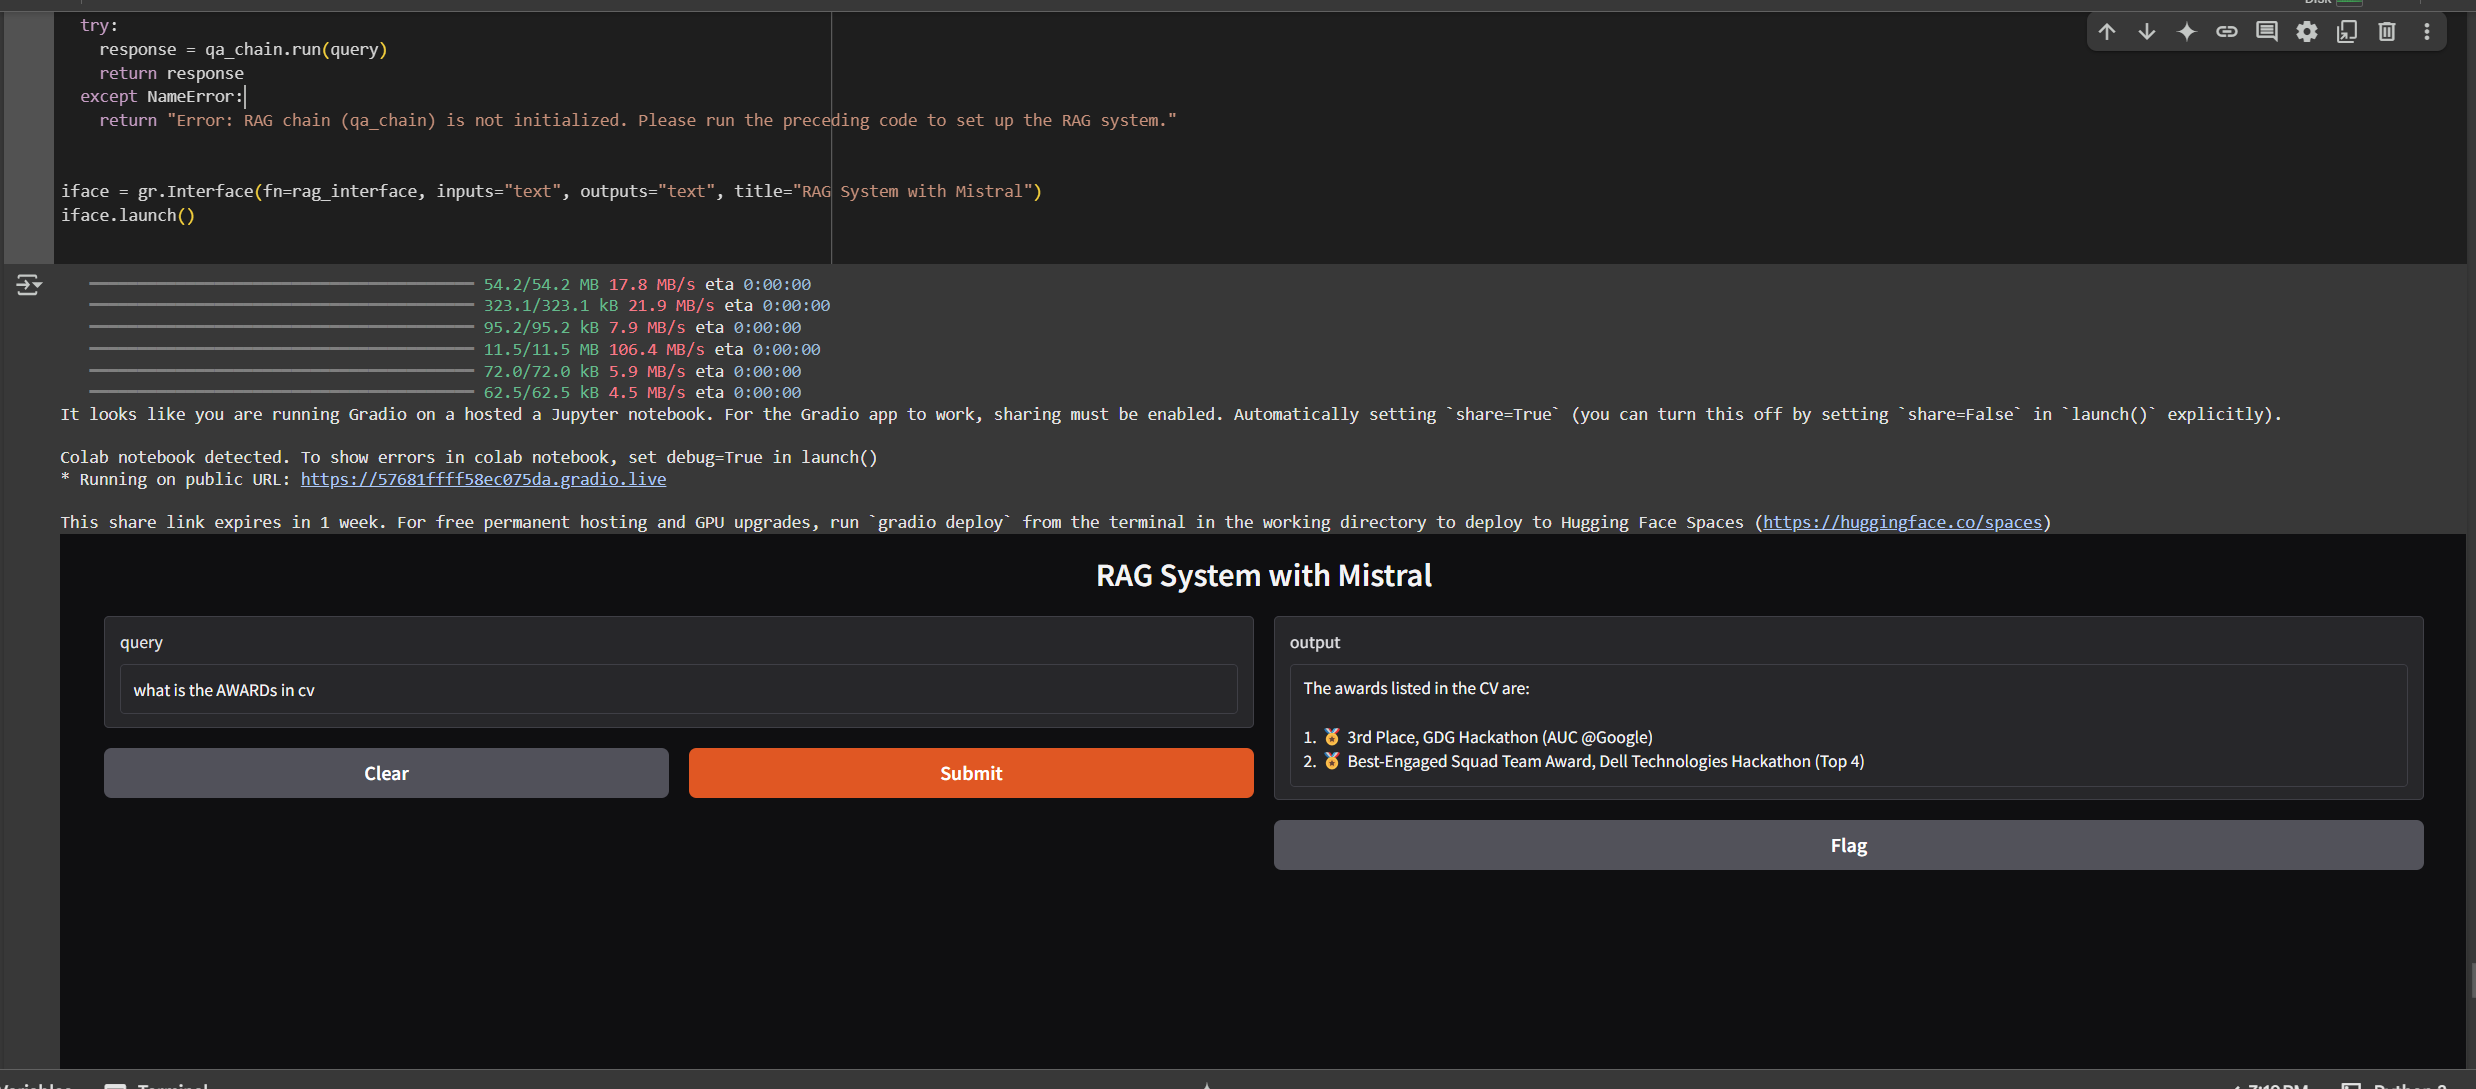

# or use the next without details about retiver

In [ ]:
import os
os.environ["MISTRAL_API_KEY"] = "Your_Api"

In [ ]:
from langchain_mistralai import MistralAIEmbeddings

embedding_model = MistralAIEmbeddings(model="mistral-embed")


In [ ]:
from langchain_core.vectorstores import InMemoryVectorStore

# Assuming 'texts' is a list of documents
vectorstore = InMemoryVectorStore.from_texts(
    texts,
    embedding=embedding_model,
)


In [ ]:
from langchain_mistralai.chat_models import ChatMistralAI

llm = ChatMistralAI(model="mistral-large-latest", temperature=0.9)


In [ ]:
from langchain.chains import RetrievalQA

retriever = vectorstore.as_retriever()

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    verbose=True,
    chain_type_kwargs={
        "document_separator": "<<<<>>>>>"
    }
)


In [ ]:
query = "what is the name for the cv employee"
response = qa_chain.run(query)
print(response)


In [ ]:
query = "what is the name for the cv employee"
response = qa_chain.run(query)
print(response)

# Evaluating LLM Applications Using LangChain

## Manual Evaluation & Debugging

In [ ]:
query= "what is the AWARDs in cv"

In [ ]:
response = qa_chain.run(query)

In [ ]:
response

# it's very perfect  but not prefere with large docs

## LLM-Assisted Evaluation

In [ ]:
from langchain.evaluation.qa import QAEvalChain

In [ ]:
llm

In [ ]:
langchain.debug = False

In [ ]:
example_gen_chain = QAEvalChain.from_llm(llm = llm)

In [ ]:
type(data)

In [ ]:
for doc in data:
  print(doc)

In [ ]:
new_examples = example_gen_chain.apply_and_parse([
    {
        "query": "What is the AWARDs in CV?",
        "answer": """The awards listed in the CV are:
1. 🏅 3rd Place, GDG Hackathon (AUC @Google)
2. 🏅 Best-Engaged Squad Team Award, Dell Technologies Hackathon (Top 4)""",
        "result": "3rd Place, GDG Hackathon (AUC @Google)"
    }
    for doc in data[0]
])


In [ ]:
new_examples

## Observing Behind the Scenes

### If we want to observe what is happening behind the scenes we can set the LangChain debug equals to true, and we now rerun the same example as above, we can see that it starts printing out a lot more information.

In [ ]:
import langchain
langchain.debug = True

In [ ]:
example_gen_chain = QAEvalChain.from_llm(llm = llm)

In [ ]:
new_examples = example_gen_chain.apply_and_parse([
    {
        "query": "What is the AWARDs in CV?",
        "answer": """The awards listed in the CV are:
1. 🏅 3rd Place, GDG Hackathon (AUC @Google)
2. 🏅 Best-Engaged Squad Team Award, Dell Technologies Hackathon (Top 4)""",
        "result": "3rd Place, GDG Hackathon (AUC @Google)"
    }
    # for doc in data[0]
])


# Agents using langchain

In [ ]:
! pip install wikipedia -q

In [ ]:
from langchain.agents import AgentType, load_tools, initialize_agent

In [ ]:
tools = load_tools(["llm-math","wikipedia"],llm= llm)

In [ ]:
agent = initialize_agent(
   tools,
   llm,
  agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
  handle_parsing_errors=True,
    verbose = True
)

In [ ]:
agent("If you have a rectangular garden with dimensions 12 meters by 8 meters, what is the total area of the garden in square meters?")

# Building Wikipedia Search Agent

In [ ]:
question = "Andrew Ng is a British-American computer scientist \
and the Founder of Coursera and Deep Learning.ai and a Professor at Stanford University\
what books did he write?"
result = agent(question)

# Building Python Programming Assistant Agent

In [ ]:
from langchain_community.agent_toolkits.load_tools import get_all_tool_names

tool_names = get_all_tool_names()
print(tool_names)


In [ ]:
! pip install langchain-experimental -q

In [ ]:
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL

In [ ]:
from langchain_experimental.agents.agent_toolkits import create_python_agent

In [ ]:
python_repl = PythonREPL()

In [ ]:
employee_list = [["Smith", "John", 35],
                 ["Doe", "Jane", 28],
                 ["Black", "Michael", 42],
                 ["Brown", "Emily", 31],
                 ["White", "David", 39],
                 ["Green", "Sarah", 45],
                 ["Jones", "Christopher", 37]
                ]

In [ ]:
response = python_repl.run(f""" Sort these employees by their age in ascending order and \
then by last name in descending order, and print the output: {employee_list}""")

In [ ]:
print(response)

In [ ]:
import langchain
langchain.debug=True
python_repl.run(f"""Sort these customers by \
last name and then first name \
and print the output: {employee_list}""")
langchain.debug=False

In [ ]:
from datetime import date
from langchain.agents import tool

In [ ]:
@tool
def time(text: str) -> str:
    """Returns todays date, use this for any \
    questions related to knowing todays date. \
    The input should always be an empty string, \
    and this function will always return todays \
    date - any date mathmatics should occur \
    outside this function."""
    return str(date.today())

In [ ]:
from datetime import date
from langchain.agents import tool
from langchain.agents import AgentType, load_tools, initialize_agent

@tool
def time(text: str) -> str:
    """Returns todays date, use this for any \
    questions related to knowing todays date. \
    The input should always be an empty string, \
    and this function will always return todays \
    date - any date mathmatics should occur \
    outside this function."""
    return str(date.today())

agent = initialize_agent(
    tools + [time],
    llm,
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose=True
)

In [ ]:
try:
    result = agent("whats the date today?")
except:
    print("exception on external access")

# it's correct and perfect

# Loading with LangChain

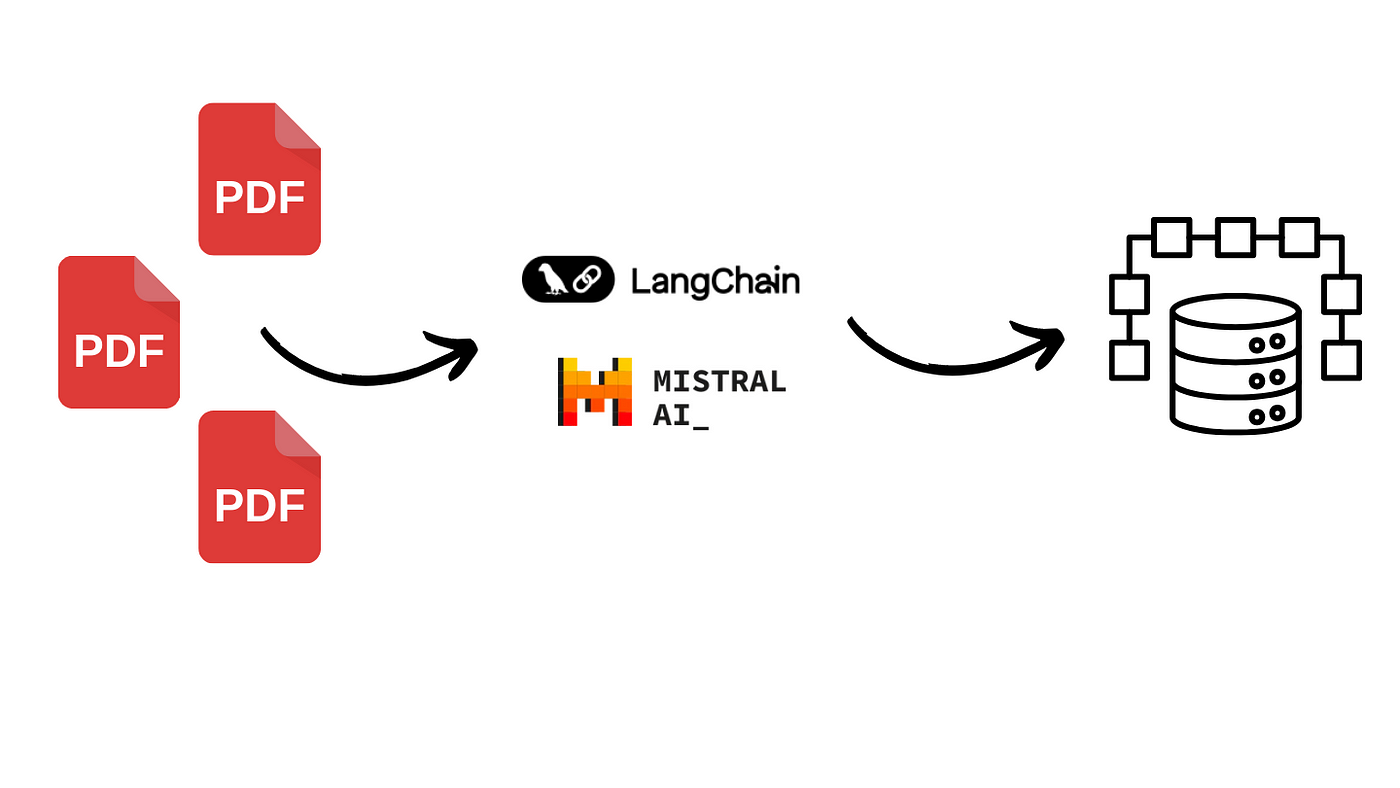

In [ ]:
! pip install -U langchain-community pypdf -q

# 📄 Loading a PDF File

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
loader = PyPDFLoader(file_path="/content/Ahmed-MahmoudL-CVNIl.pdf")

In [ ]:
loader

In [ ]:
response = loader.load()

In [ ]:
response[0].page_content

In [ ]:
response[0].metadata

# Loading CSV Files

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

In [ ]:
loader_csv = CSVLoader(file_path="/content/prepared_data.csv")

In [ ]:
loader_csv.load()

In [ ]:
loader_csv.load()[:100]

# Loading Microsoft Excel Files (xls & xlsx)

In [ ]:
from langchain_community.document_loaders import UnstructuredExcelLoader
from langchain_community.document_loaders import WebBaseLoader

In [ ]:
# loader = UnstructuredExcelLoader("sample-xls-data/file_example_XLS_50.xls", mode="elements")
# docs = loader.load()
# docs[0]

In [ ]:
loader = WebBaseLoader("https://github.com/AhemdMahmoud/gr-pr")
docs = loader.load()

In [ ]:
print(docs[0].page_content[:300])


## Loading YouTube Videos into Text

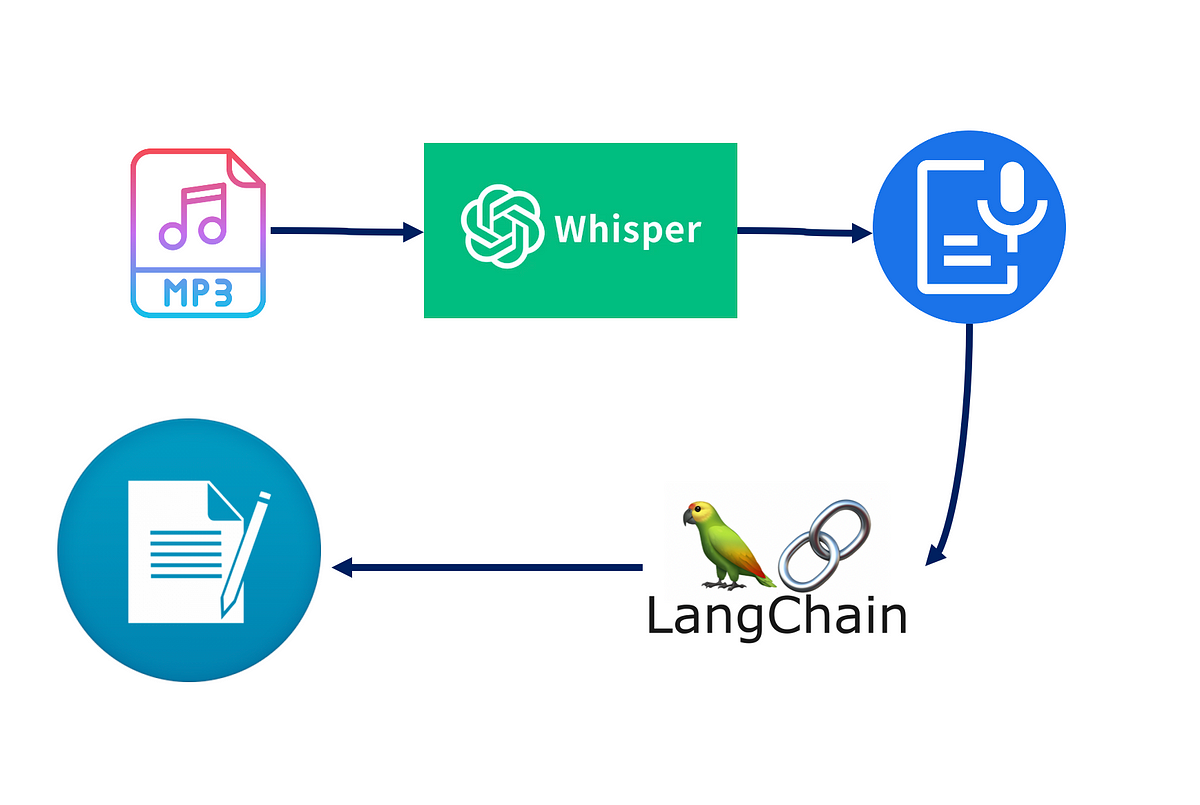

In [ ]:
from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers.audio import FasterWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
! pip install yt_dlp -q
! pip install faster-whisper pydub -q


In [ ]:
url = "https://www.youtube.com/watch?v=5p248yoa3oE"
save_dir = "docs/youtube/"

In [ ]:
loader =  GenericLoader(
      YoutubeAudioLoader([url],save_dir),
      FasterWhisperParser()
)
docs = loader.load()

# Loading Files using detection

In [ ]:
import os

In [ ]:
DOCUMENT_MAP = {
    ".csv": CSVLoader,
    ".xls": UnstructuredExcelLoader,
    ".xlsx": UnstructuredExcelLoader,
    '.pdf': PyPDFLoader,
    # ".docx": Docx2txtLoader,
    # ".doc": Docx2txtLoader,
    }

In [ ]:
doc_file = "/content/Ahmed-MahmoudL-CVNIl.pdf"
file_extension = os.path.splitext(doc_file)[1]
loader_class = DOCUMENT_MAP.get(file_extension)

In [ ]:
loader = loader_class(doc_file)
loader.load()